In [1]:
import matplotlib
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower


matplotlib.rcParams['figure.dpi'] = 400

%matplotlib inline

## Power vs _p_-value

In [31]:
def simulate(n=1000):
    X = np.random.randn(n) + 10
    Y = np.random.randn(n) + 10.1
    test = ttest_ind(X, Y, equal_var=True, alternative="two-sided")
    
    effect_size = np.abs(X.mean() - Y.mean()) / X.std()
    
    power = TTestIndPower().power(
        effect_size=effect_size,
        nobs1=n,
        alpha=0.95,
        ratio=1,  # nobs2 / nobs1
        alternative="two-sided"
    )  
    
    return test.pvalue, power

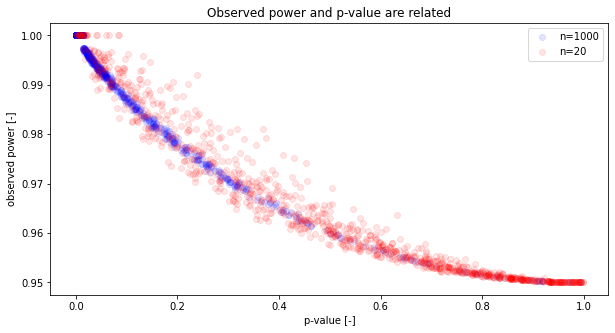

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(
    *zip(*[simulate(n=1000) for _ in range(1000)]),
    alpha=0.1,
    color="blue",
    label="n=1000",
)

ax.scatter(
    *zip(*[simulate(n=20) for _ in range(1000)]),
    alpha=0.1,
    color="red",
    label="n=20",
)

ax.set_xlabel("p-value [-]")
ax.set_ylabel("observed power [-]")
ax.set_title("Observed power and p-value are related")
ax.legend()
plt.show()